In [7]:
import seaborn as sns
import pandas as pd
import gower
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering

In [26]:
encodings = [f'encoded_{i}' for i in range(30)]
features = ['width_painting_cm', 'kunstenaar', 'height_painting_cm', 'width_frame_cm', 'height_frame_cm', 'condition',
            'technique', 'signed', 'period', 'style', 'subject', 'price', 'price_binned', 'file_path']

In [34]:
data = pd.read_csv("../data preprocessing/final_df_with_encodings_with_price_binned.csv", header=0,
                           usecols=[*encodings])

In [35]:
data.iloc[0:1,:]

,encoded_0,encoded_1,encoded_2,encoded_3,encoded_4,encoded_5,encoded_6,encoded_7,encoded_8,encoded_9,...,encoded_20,encoded_21,encoded_22,encoded_23,encoded_24,encoded_25,encoded_26,encoded_27,encoded_28,encoded_29
0,1.82,1.542318,-0.142193,0.616663,-1.450526,0.191759,-0.727281,1.263979,-0.686015,-0.599292,...,1.782341,-0.3289,-0.380606,-0.385525,-0.151561,-1.825035,0.661603,-0.59959,-0.612351,0.09776


In [36]:
data.iloc[484:485, :]

,encoded_0,encoded_1,encoded_2,encoded_3,encoded_4,encoded_5,encoded_6,encoded_7,encoded_8,encoded_9,...,encoded_20,encoded_21,encoded_22,encoded_23,encoded_24,encoded_25,encoded_26,encoded_27,encoded_28,encoded_29
484,1.279142,0.775848,-0.523543,0.478335,-0.935453,0.098635,-0.749096,0.164567,-0.413319,-0.858166,...,2.240485,-0.120766,-0.057597,-0.619317,-0.240942,-1.621247,1.12372,-0.42186,-0.363218,0.785817


In [37]:
gower.gower_topn(data.iloc[0:1,:], data, n = 10)

{'index': array([  0, 568, 484, 219,   5, 580, 310, 628, 517, 445], dtype=int64),
 'values': array([0.        , 0.10551425, 0.10598105, 0.10817131, 0.11705487,
        0.1174033 , 0.12597571, 0.12790409, 0.1299731 , 0.13100964],
       dtype=float32)}

In [43]:
import cv2

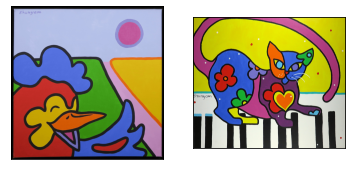

In [49]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(cv2.cvtColor(cv2.imread('../cropped_data/0000.png'), cv2.COLOR_BGR2RGB))
axs[1].imshow(cv2.cvtColor(cv2.imread('../cropped_data/0568.png'), cv2.COLOR_BGR2RGB))

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
plt.savefig('../plots/cluster_encoding.png')

In [5]:
plottable = PCA(n_components=3, svd_solver='full').fit_transform(data)

In [10]:
distances = gower.gower_matrix(plottable)

In [11]:
cluster = SpectralClustering(3, affinity='precomputed', n_init=200, n_jobs=-1).fit(distances)

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

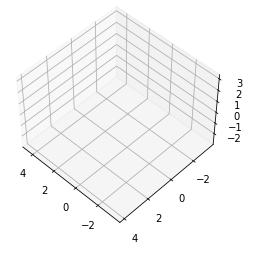

In [16]:
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, elev=48, azim=134)

ax.scatter(plottable[:, 0], plottable[:, 1], plottable[:, 2], cmap=plt.cm.nipy_spectral,
           edgecolor='k')

plt.cla()